# Getting Real with Real Estate

Hold for intro paragraph

### Load Data

In [5]:
#Libraries needed
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
og=pd.read_csv('train.csv', sep=',')
df_iowa = og.copy()

og_slo=pd.read_csv('RealEstate.csv', sep =',')
df_slo = og_slo.copy()

og_nc=pd.read_excel('woodard.xls')
df_nc = og_nc.copy()

## Data Exploration

Major points to cover (Iowa):
4 houses have 0 bedrooms
Houses above 4k sq ft are weird
Sales price should be in log

To be inserted:
summary stats of major columns

In [20]:
#0 bedroom houses

with pd.option_context("display.max_columns", 90):
    print(df_iowa[df_iowa['BedroomAbvGr'] == 0])


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
189    190         120       RL         41.0     4923   Pave   NaN      Reg   
634    635          90       RL         64.0     6979   Pave   NaN      Reg   
1163  1164          90       RL         60.0    12900   Pave   NaN      Reg   
1213  1214          80       RL          NaN    10246   Pave   NaN      IR1   
1270  1271          40       RL          NaN    23595   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
189          Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
634          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1163         Lvl    AllPub    Inside       Gtl       Sawyer      Feedr   
1213         Lvl    AllPub   CulDSac       Gtl       Sawyer       Norm   
12

## Handaling Missing Values and Outliers

Hold for explanation

## Engineering Features

Major points:
log sale price
bath calculation
bed bath tuple

In [21]:
#bed bath graph

pd.crosstab(df_iowa.bath,df_iowa.BedroomAbvGr)


BedroomAbvGr,0,1,2,3,4,5,6,8
bath,,,,,,,,
1.0,0,8,108,105,5,2,0,0
1.5,1,2,23,86,17,0,0,0
2.0,1,22,131,233,56,9,3,1
2.5,3,12,26,189,61,3,1,0
3.0,1,5,57,98,21,2,2,0
3.5,0,1,12,87,41,3,0,0
4.0,0,0,1,3,8,1,0,0
4.5,0,0,0,2,3,1,1,0
5.0,0,0,0,0,1,0,0,0


In [12]:
df_iowa['log_SalePrice'] = np.log(df_iowa['SalePrice'])

# half bath is 0.5
df_iowa['hbath'] = df_iowa['BsmtHalfBath'] + df_iowa['HalfBath']  
df_iowa['hbath'] = np.where(df_iowa['hbath'] > 0, df_iowa['hbath']/2 , 0)
df_iowa['bath'] = df_iowa['BsmtFullBath'] + df_iowa['FullBath'] + df_iowa['hbath']

#bed_bath tuple
df_iowa['bed_bath'] = df_iowa[['BedroomAbvGr', 'bath']].apply(tuple, axis=1)

#sum bed bath
df_iowa['sum_bed_bath'] = df_iowa.BedroomAbvGr + df_iowa.bath



## Identify Valuable Relationships

### Bed/Bath and Sales Price

Summary:
Bath is a better indicator than bedroom or bed bath

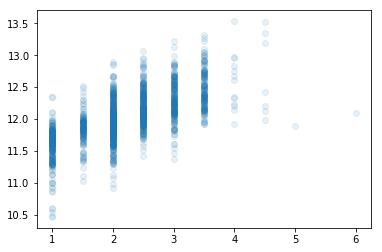

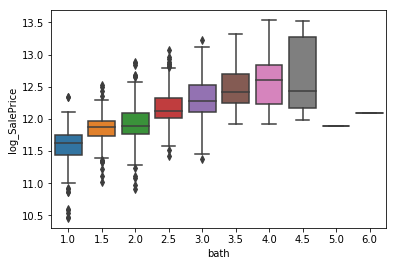

In [8]:
#bath has a strong correlation 
plt.scatter(df_iowa['bath'], df_iowa['log_SalePrice'], alpha = 0.1 )
plt.show()
sns.boxplot(df_iowa['bath'], df_iowa['log_SalePrice'])

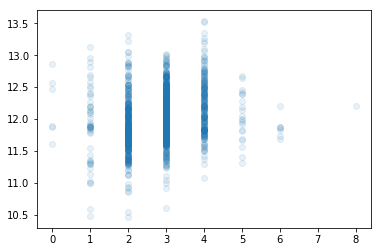

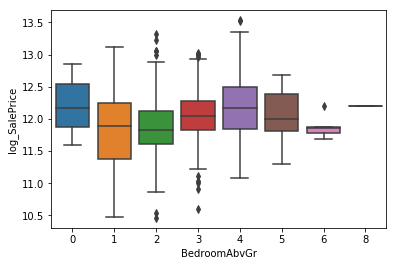

In [9]:
#bedroom correlation is not as strong
plt.scatter(df_iowa['BedroomAbvGr'], df_iowa['log_SalePrice'], alpha = 0.1 )
plt.show()
sns.boxplot(df_iowa['BedroomAbvGr'], df_iowa['log_SalePrice'])

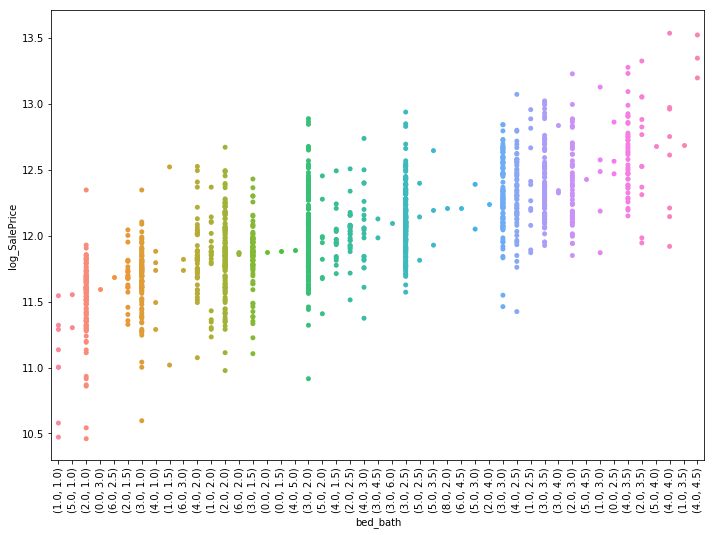

In [19]:
#can we see trend is made as tuples - no logical order
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
sns.stripplot(df_iowa['bed_bath'], df_iowa['log_SalePrice'], order=df_iowa['log_SalePrice'].groupby(df_iowa['bed_bath']).median().sort_values().index.values)


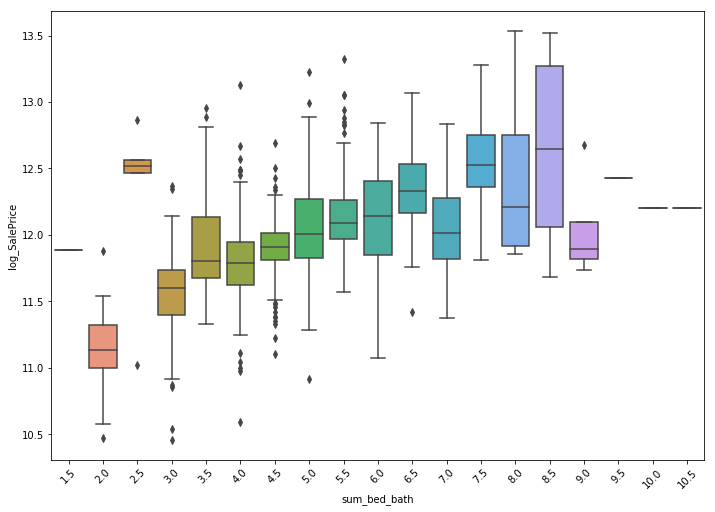

In [23]:
#summing bed and bath increase correlation

# df[['lat', 'long']].apply(tuple, axis=1)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=45)
sns.boxplot(df_iowa['sum_bed_bath'], df_iowa['log_SalePrice'])
# sns.stripplot(df_iowa['sum_bed_bath'], df_iowa['log_SalePrice'])

In [24]:
#ultimately nothing beats bath 
print(np.corrcoef(df_iowa.bath, df_iowa.log_SalePrice)[0, 1])
print(np.corrcoef(df_iowa.BedroomAbvGr, df_iowa.log_SalePrice)[0, 1])
print(np.corrcoef(df_iowa.sum_bed_bath, df_iowa.log_SalePrice)[0, 1])

0.6730105940434344
0.20904368212692034
0.5556003391369868


## Confirm Trend